In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [2]:
df = pd.read_csv('survey_responses.csv')

In [3]:
df

,How many hours/week did you spend on SGO 1 during your first semester at Harvard?,How many hours/week do you still spend on SGO 1 now?,How many hours/week did you spend on SGO 2 during your first semester at Harvard?,How many hours/week do you still spend on SGO 2 now?,How many hours/week did you spend on SGO 3 during your first semester at Harvard?,How many hours/week do you still spend on SGO 3 now?,How many hours/week did you spend on SGO 4 during your first semester at Harvard?,How many hours/week do you still spend on SGO 4 now?,How many hours/week did you spend on SGO 5 during your first semester at Harvard?,How many hours/week do you still spend on SGO 5 now?,How many semesters have you completed at Harvard (not including this fall)?
0,5,10,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,3,10,5.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,2
3,0,6,3.0,3.0,1.0,1.0,0.0,4.0,NaN,NaN,2
4,10,0,6.0,0.0,1.0,5.0,NaN,NaN,NaN,NaN,2
5,3,3,5.0,5.0,7.0,3.0,2.0,5.0,3.0,3.0,4
6,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
7,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8,0,10,2.0,6.0,0.0,2.0,NaN,NaN,NaN,NaN,4
9,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [4]:
df.values

array([[  5.,  10.,   3.,   0.,  nan,  nan,  nan,  nan,  nan,  nan,   4.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.],
       [  3.,  10.,   5.,   0.,   6.,   0.,   0.,   0.,   0.,   0.,   2.],
       [  0.,   6.,   3.,   3.,   1.,   1.,   0.,   4.,  nan,  nan,   2.],
       [ 10.,   0.,   6.,   0.,   1.,   5.,  nan,  nan,  nan,  nan,   2.],
       [  3.,   3.,   5.,   5.,   7.,   3.,   2.,   5.,   3.,   3.,   4.],
       [ 10.,  10.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,   6.],
       [  1.,   3.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,   2.],
       [  0.,  10.,   2.,   6.,   0.,   2.,  nan,  nan,  nan,  nan,   4.],
       [ 10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.],
       [  5.,  10.,   3.,  10.,   2.,   0.,   3.,   3.,   0.,   2.,   2.],
       [  1.,   0.,   1.,   0.,  nan,  nan,  nan,  nan,  nan,  nan,   4.],
       [  3.,   0.,   0.,   2.,   4.,   1.,  nan,  nan,  nan,  nan,   2.],
       [  7.,   9.,   0.,

In [5]:
column_names = ['time_first_semester', 'time_now', 'num_of_semesters']

In [6]:
sgo_data = pd.DataFrame(columns=column_names)
sgo_data

,time_first_semester,time_now,num_of_semesters


In [7]:
relevant_data = []
for response in df.values:
    for i in range(5):
        if not pd.isnull(response[i]):
            if pd.isnull(response[i+1]):
                response[i+1] = 0
            relevant_data.append([response[i], response[i+1], response[-1]])
relevant_data = np.array(relevant_data)

In [8]:
relevant_data

array([[  5.,  10.,   4.],
       [ 10.,   3.,   4.],
       [  3.,   0.,   4.],
       [  0.,   0.,   4.],
       [  0.,   0.,   4.],
       [  0.,   0.,   4.],
       [  0.,   0.,   4.],
       [  0.,   0.,   4.],
       [  0.,   0.,   4.],
       [  0.,   0.,   4.],
       [  3.,  10.,   2.],
       [ 10.,   5.,   2.],
       [  5.,   0.,   2.],
       [  0.,   6.,   2.],
       [  6.,   0.,   2.],
       [  0.,   6.,   2.],
       [  6.,   3.,   2.],
       [  3.,   3.,   2.],
       [  3.,   1.,   2.],
       [  1.,   1.,   2.],
       [ 10.,   0.,   2.],
       [  0.,   6.,   2.],
       [  6.,   0.,   2.],
       [  0.,   1.,   2.],
       [  1.,   5.,   2.],
       [  3.,   3.,   4.],
       [  3.,   5.,   4.],
       [  5.,   5.,   4.],
       [  5.,   7.,   4.],
       [  7.,   3.,   4.],
       [ 10.,  10.,   6.],
       [ 10.,   0.,   6.],
       [  0.,   0.,   6.],
       [  0.,   0.,   6.],
       [  0.,   0.,   6.],
       [  1.,   3.,   2.],
       [  3.,   0.,   2.],
 

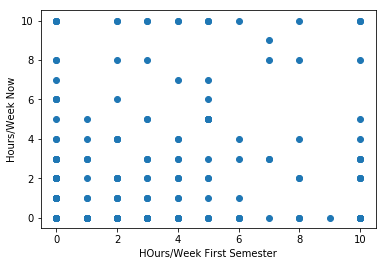

In [9]:
plt.scatter(relevant_data[:,0], relevant_data[:,1])
plt.ylabel('Hours/Week Now')
plt.xlabel('HOurs/Week First Semester')
plt.show()

In [11]:
time_now = [ [] for _ in range(11)]
time_now

[[], [], [], [], [], [], [], [], [], [], []]

In [13]:
for sgo in relevant_data:
    time_now[int(sgo[0])].append(sgo[1])

In [14]:
time_now

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  6.0,
  6.0,
  6.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  10.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  2.0,
  7.0,
  1.0,
  0.0,
  0.0,
  2.0,
  3.0,
  1.0,
  2.0,
  0.0,
  1.0,
  0.0,
  10.0,
  5.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  6.0,
  3.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  2.0,
  10.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  10.0,
  3.0,
  8.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  10.0,
  2.0,
  4.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  2.0,
  8.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  4.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  3.0,
  3.0,
  0.0,
  0.0,
  0.0,
  1.0],
 [1.0,
  5.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  4.0,
  1.0,
  2.0,
  0.0,
  3.0,
  0.0,
  0.0,
  3.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [6.0,
  0.0,
  4.0,
  0.0,
  0.0,
  8.0,
  0.0,
  0.0,
  2.0,

In [17]:
np.array(time_now)

array([ list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 6.0, 6.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 7.0, 1.0, 0.0, 0.0, 2.0, 3.0, 1.0, 2.0, 0.0, 1.0, 0.0, 10.0, 5.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 10.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 3.0, 8.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 10.0, 2.0, 4.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 3.0, 0.0, 0.0, 0.0, 1.0]),
       list([1.0, 5.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 1.0, 2.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0]),
       list([6.0, 0.0, 4.0, 0.0, 0.0, 8.0, 0.0, 0.0, 2.0, 0.0, 4.0, 0.0, 0.0, 0.0, 10.0, 0.0, 1.0, 0.0, 1.0, 2.0, 1.0, 4.0, 2.0, 2.0, 2.0, 10.0, 4.0, 1.0]),
       list([0.0, 10.0, 3.0, 1.0, 3.0, 5.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 2.0, 5.0, 3.0, 1.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0]),


In [20]:
average_time_now = list(map(lambda x: np.mean(x), time_now))

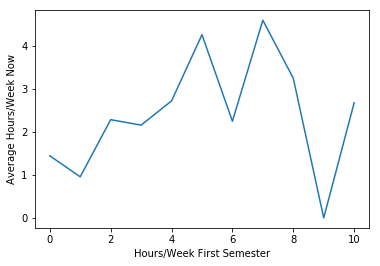

In [61]:
plt.plot(range(11), average_time_now)
plt.ylabel('Average Hours/Week Now')
plt.xlabel('Hours/Week First Semester')
plt.savefig('average.png')
plt.show()

In [25]:
percent_dropped = list(map(lambda x: 1 - np.count_nonzero(x)/len(x), time_now)) * 100

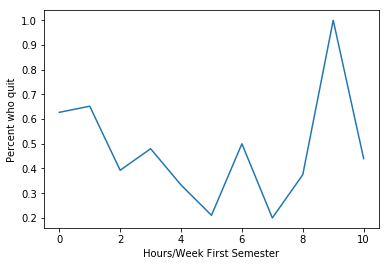

In [60]:
plt.plot(range(11), percent_dropped)
plt.ylabel('Percent who quit')
plt.xlabel('Hours/Week First Semester')
plt.savefig('percent_who_quit.png')
plt.show()

In [30]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(relevant_data[:,0].reshape(-1,1), relevant_data[:,1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
bubble_counts = np.zeros((11,11))
relevant_data = list(map(lambda x: [ int(y) for y in x], relevant_data))
relevant_data

[[5, 10, 4],
 [10, 3, 4],
 [3, 0, 4],
 [0, 0, 4],
 [0, 0, 4],
 [0, 0, 4],
 [0, 0, 4],
 [0, 0, 4],
 [0, 0, 4],
 [0, 0, 4],
 [3, 10, 2],
 [10, 5, 2],
 [5, 0, 2],
 [0, 6, 2],
 [6, 0, 2],
 [0, 6, 2],
 [6, 3, 2],
 [3, 3, 2],
 [3, 1, 2],
 [1, 1, 2],
 [10, 0, 2],
 [0, 6, 2],
 [6, 0, 2],
 [0, 1, 2],
 [1, 5, 2],
 [3, 3, 4],
 [3, 5, 4],
 [5, 5, 4],
 [5, 7, 4],
 [7, 3, 4],
 [10, 10, 6],
 [10, 0, 6],
 [0, 0, 6],
 [0, 0, 6],
 [0, 0, 6],
 [1, 3, 2],
 [3, 0, 2],
 [0, 0, 2],
 [0, 0, 2],
 [0, 0, 2],
 [0, 10, 4],
 [10, 2, 4],
 [2, 6, 4],
 [6, 0, 4],
 [0, 2, 4],
 [10, 0, 4],
 [0, 0, 4],
 [0, 0, 4],
 [0, 0, 4],
 [0, 0, 4],
 [5, 10, 2],
 [10, 3, 2],
 [3, 10, 2],
 [10, 2, 2],
 [2, 0, 2],
 [1, 0, 4],
 [0, 1, 4],
 [1, 0, 4],
 [0, 0, 4],
 [0, 0, 4],
 [3, 0, 2],
 [0, 0, 2],
 [0, 2, 2],
 [2, 4, 2],
 [4, 1, 2],
 [7, 9, 2],
 [9, 0, 2],
 [0, 7, 2],
 [7, 0, 2],
 [0, 1, 2],
 [5, 6, 4],
 [6, 1, 4],
 [1, 0, 4],
 [0, 0, 4],
 [0, 0, 4],
 [0, 2, 2],
 [2, 0, 2],
 [0, 3, 2],
 [3, 0, 2],
 [0, 1, 2],
 [10, 8, 2],
 [8, 10, 2],

In [43]:
for pt in relevant_data:
    bubble_counts[pt[0], pt[1]] += 1

In [44]:
bubble_counts

array([[ 69.,   9.,  11.,   6.,   2.,   1.,   4.,   1.,   2.,   0.,   5.],
       [ 15.,   2.,   1.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   0.],
       [ 11.,   4.,   5.,   0.,   4.,   0.,   1.,   0.,   1.,   0.,   2.],
       [ 12.,   3.,   2.,   3.,   0.,   2.,   0.,   0.,   1.,   0.,   2.],
       [  6.,   2.,   3.,   2.,   2.,   0.,   0.,   1.,   0.,   0.,   2.],
       [  4.,   1.,   2.,   1.,   0.,   6.,   1.,   1.,   0.,   0.,   3.],
       [  4.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.],
       [  1.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   1.,   0.],
       [  3.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.],
       [  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 11.,   0.,   4.,   4.,   1.,   1.,   0.,   0.,   1.,   0.,   3.]])

In [49]:
xs = np.array([[x] * 11 for x in range(11)]).flatten()
ys = np.array([range(11)] * 11).flatten()
ys

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10])

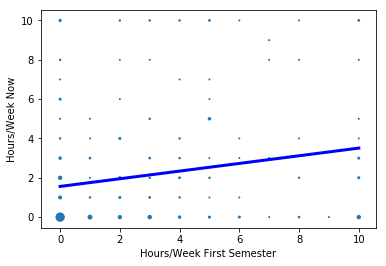

In [59]:
plt.plot(range(11), regr.predict(np.array(range(11)).reshape(-1,1)), color='blue', linewidth=3)
plt.scatter(xs, ys, bubble_counts.flatten())
plt.xlabel('Hours/Week First Semester')
plt.ylabel('Hours/Week Now')
plt.savefig('linear_regression.png')
plt.show()